In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from sklearn.cluster import KMeans
from keras.applications import VGG16

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_path = r"Combined_images"
# Load images using OpenCV
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif') or filename.endswith('.JPG'):
        img = cv2.imread(os.path.join(data_path, filename))
        image_list.append(img)

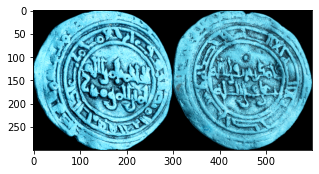

In [3]:
fig = plt.figure(figsize=(5, 6))
  
fig.add_subplot(1, 1, 1)
plt.imshow(image_list[0] )

In [ ]:
# resized_image_list = [cv2.resize(image, (150, 300)) for image in image_list]

In [4]:
from sklearn.model_selection import train_test_split

# Assuming resized_image_list contains your images
X = image_list  # Features (images)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming the images are RGB (3 channels)
input_shape = (300, 600, 3)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the output of the conv layers to pass it to the dense layer
    Flatten(),
    
    # Add a dense layer to generate feature vectors. 
    # You can adjust the size of the output (e.g., 256) based on your needs
    Dense(256, activation='relu'),
])

# Display the model's architecture
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 598, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 299, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 297, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 148, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 146, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 73, 128)     

In [8]:
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
import numpy as np
from sklearn.cluster import KMeans
from keras.applications import VGG16

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


# Extract features
features = model.predict(X_train)

# Assuming 'features' is an array of feature vectors for your images
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)
cluster_labels = kmeans

553467096/553467096 [==============================] - 21s 0us/step


ValueError: in user code:

    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 1 input(s), but it received 350 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 600, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 600, 3) dtype=uint8>]


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from sklearn.cluster import KMeans
from keras.applications import VGG16

# Set the path to your image directory
data_path = "Combined_images"

# Load images using Pillow
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif') or filename.endswith('.JPG'):
        img = Image.open(os.path.join(data_path, filename))
        image_list.append(np.array(img))  # Convert PIL Image to numpy array

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
# Resize images
#resized_image_list = [np.array(img.resize((150, 300))) for img in image_list]
resized_image_list = [cv2.resize(image, (300, 150)) for image in image_list]

In [ ]:

# Convert resized_image_list to numpy array
# X = np.array(resized_image_list)
X = np.array(image_list)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [6]:
from sklearn.cluster import KMeans

# Flatten the images to make them suitable for clustering
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Dimensionality reduction (optional)
# You can skip this step and directly apply K-means if your data is not too high-dimensional
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)  # Adjust the number of components as needed
# X_train_flat = pca.fit_transform(X_train_flat)
# X_test_flat = pca.transform(X_test_flat)

# Initialize and fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_flat)

# Predict clusters for the test set
predicted_labels = kmeans.predict(X_test_flat)

# Visualize the clusters (optional)
# You can visualize the clusters using the reduced dimensions obtained from PCA or t-SNE
# Visualization helps in understanding the clustering results
# You may also use other techniques for visualization like UMAP
# Visualizing high-dimensional data directly is not feasible

# Evaluate the clustering (optional)
# Since this is unsupervised learning, you may not have ground truth labels to evaluate the clustering
# However, you can use metrics like silhouette score or Davies-Bouldin index to evaluate the quality of clustering


AttributeError: 'NoneType' object has no attribute 'split'

In [47]:
len(predicted_labels)

86

In [7]:
pip install openblas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openblas (from versions: none)
ERROR: No matching distribution found for openblas


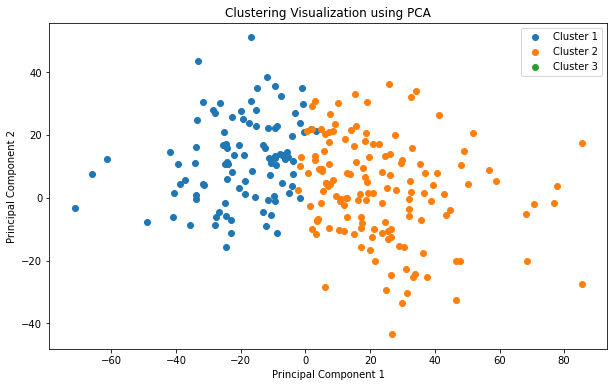

In [12]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flat)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
for cluster_label in range(1,4):
    plt.scatter(X_train_pca[kmeans.labels_ == cluster_label, 0],
                X_train_pca[kmeans.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

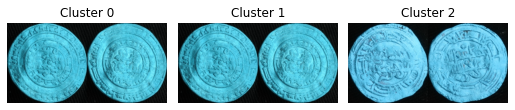

List of file names:
combined_150904.1.jpg_150904.2.jpg
combined_150904.1.jpg_150904.2.jpg
combined_150740.1.jpg_150740.2.jpg


In [11]:
# Find centroid of each cluster
centroids = kmeans.cluster_centers_

# Calculate distances from each data point to centroids
distances = np.sqrt(((X_train_flat[:, np.newaxis] - centroids) ** 2).sum(axis=2))

# Find the index of the closest image to each centroid
closest_image_indices = np.argmin(distances, axis=0)

# Create a list to store the file names
file_names_list = []

# Plot one image from each cluster
plt.figure(figsize=(12, 6))
for i, idx in enumerate(closest_image_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f'Cluster {i}')
    plt.axis('off')
    file_name = os.listdir(data_path)[idx]  # Get the file name corresponding to the selected image
    file_names_list.append(file_name)  # Append the file name to the list
    plt.xlabel(file_name, fontsize=8)  # Print the file name in white
plt.tight_layout()
plt.show()

# Print the list of file names
print("List of file names:")
for file_name in file_names_list:
    print(file_name)


In [52]:
predicted_labels

array([0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2])